### PCA

데이터 집합 내에 존재하는 각 데이터의 차이를 가장 잘 나타매는 요소를 찾아내는 방법

통계 데이터 분석(주성준 찾기), 데이터 압축(차원 감소), 너이즈 제거 등 다양한 분야에서 사용 

변수추출은 기존 변수를 조합해 새로운 변수를 만드는 기법 (변수 선택과 구분할 것)


    주성분 분석(Principal Component Analysis, PCA)은 다차원 데이터의 차원을 줄이고 데이터의 주요 구조를 추출하는 통계적 기법입니다. PCA는 변수 간의 상관관계를 고려하여 데이터를 새로운 변수, 즉 주성분(principal component)으로 변환합니다. 이 주성분들은 원래 변수들의 선형 조합으로 이루어져 있으며 서로 직교(상관관계가 없음)합니다.

    PCA의 주요 목표는 가능한한 많은 정보를 유지하면서 데이터셋의 차원을 줄이는 것입니다. 이를 위해 PCA는 주성분들을 분산의 설명력에 따라 순위를 매깁니다. 첫 번째 주성분은 최대한의 분산을 설명하며, 두 번째, 세 번째 순서로 설명력이 감소합니다. 총 분산의 중요한 부분을 설명하는 주성분들의 부분 집합을 선택함으로써 데이터의 차원을 효과적으로 축소할 수 있습니다.

    요약하면, PCA는 주성분 분석이라는 강력한 기법으로, 차원 축소와 데이터 탐색을 위해 고차원 데이터를 저차원 공간으로 효과적으로 표현함으로써 중요한 정보를 보존할 수 있게 해줍니다

<img src = 'https://builtin.com/sites/www.builtin.com/files/inline-images/national/Principal%2520Component%2520Analysis%2520second%2520principal.gif'>


###### _Image by <a href = 'https://builtin.com/data-science/step-step-explanation-principal-component-analysis'>A Step-by-Step Explanation of Principal Component Analysis</a>_

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#  시드 값은 난수 생성 과정에서의 초기 상태를 결정하는 역할을 합니다. 동일한 시드 값으로 초기화하면 동일한 난수 패턴을 얻을 수 있습니다.
rng = np.random.RandomState(13) #시드 값이 13인 난수 생성기
# rng.rand(2, 2)는 0과 1 사이의 난수로 이루어진 2x2 배열을 생성합니다.
# rng.randn(2, 200)는 표준 정규 분포(평균 0, 표준 편차 1)에서 추출된 난수로 이루어진 2x200 배열을 생성합니다.
X = np.dot(rng.rand(2,2),rng.randn(2, 200)).T #  두 개의 배열 간의 행렬 곱셈
X.shape

(200, 2)

(-2.346839332894307, 2.4400046646752487, -3.8591181666878738, 4.08448257499405)

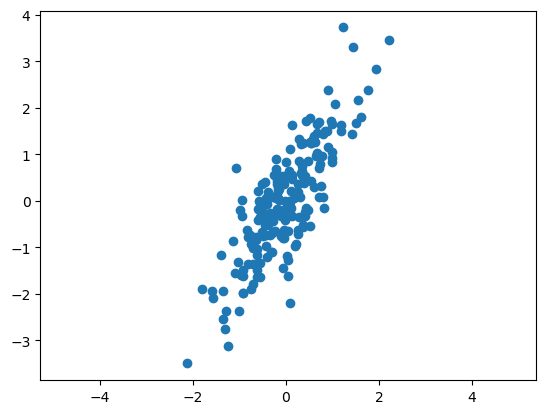

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

In [8]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2, random_state=13)
pca.fit(X)

PCA(n_components=2, random_state=13)

In [11]:
pca.components_

array([[ 0.47802511,  0.87834617],
       [-0.87834617,  0.47802511]])

In [12]:
pca.explained_variance_

array([1.82531406, 0.13209947])

In [13]:
pca.explained_variance_

array([1.82531406, 0.13209947])

In [14]:
pca.explained_variance_ratio_

array([0.93251326, 0.06748674])

In [20]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(
        arrowstyle='->',
        linewidth = 2,
        color='black',
        shrinkA=0,
        shrinkB=0
    )

    ax.annotate('', v1, v0, arrowprops=arrowprops)

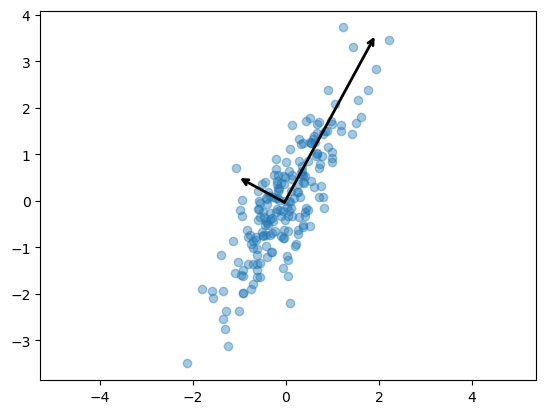

In [21]:
plt.scatter(X[:,0], X[:,1], alpha=0.4)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')
plt.show()

#### 데이터의 주성분을 찾으면 주축을 면경 가능

In [23]:
pca = PCA(n_components=1, random_state=13)
pca.fit(X)

PCA(n_components=1, random_state=13)

In [24]:
pca.components_

array([[0.47802511, 0.87834617]])

In [25]:
pca.mean_

array([-0.03360413, -0.03527382])

In [26]:
pca.explained_variance_

array([1.82531406])

In [28]:
X

array([[-1.07103225e-01, -3.31411265e-01],
       [ 3.61221011e-01,  4.12447007e-01],
       [ 7.92641186e-01,  7.83199551e-02],
       [ 1.22190326e+00,  3.72340981e+00],
       [ 1.17483182e+00,  1.62026754e+00],
       [ 3.66455040e-01, -5.23265709e-01],
       [ 8.14057485e-01, -1.46869632e-01],
       [-7.82888709e-01, -7.39292503e-01],
       [-7.05016180e-01, -1.02201438e+00],
       [-1.34957018e+00, -2.53775010e+00],
       [ 2.89674499e-02, -1.19791431e+00],
       [-1.84963913e-01, -1.83202370e-01],
       [ 6.00056811e-01,  3.03677108e-01],
       [ 3.41934464e-01,  6.48346265e-01],
       [ 7.11548542e-02, -8.29059119e-03],
       [ 1.93385201e+00,  2.83564626e+00],
       [ 3.67276222e-02, -1.26791221e+00],
       [ 1.22164133e-01,  5.59251496e-01],
       [-9.58632015e-01, -1.59689218e+00],
       [ 7.03686415e-01,  7.75747902e-02],
       [ 9.69778312e-01,  1.71544460e+00],
       [-1.30345417e+00, -2.75798682e+00],
       [-1.33857699e-01, -2.04773486e-01],
       [ 9.

In [27]:
X_pca = pca.transform(X)
X_pca

array([[-2.95245605e-01],
       [ 5.81990204e-01],
       [ 4.94740664e-01],
       [ 3.90158943e+00],
       [ 2.03180114e+00],
       [-2.37387479e-01],
       [ 3.07183781e-01],
       [-9.76548958e-01],
       [-1.18765161e+00],
       [-2.82710528e+00],
       [-9.91290035e-01],
       [-2.02286254e-01],
       [ 6.00622089e-01],
       [ 7.79971960e-01],
       [ 7.37780392e-02],
       [ 3.46215509e+00],
       [-1.04906286e+00],
       [ 5.96660174e-01],
       [-1.81382807e+00],
       [ 4.51563537e-01],
       [ 2.01737882e+00],
       [-2.99850475e+00],
       [-1.96803107e-01],
       [-4.03478939e-02],
       [-5.99621281e-01],
       [-1.66341828e+00],
       [ 1.91711964e+00],
       [-1.26733467e+00],
       [ 5.67207186e-01],
       [ 2.22460631e+00],
       [-7.83250597e-01],
       [-1.85775051e+00],
       [-2.27800068e-01],
       [-1.24793583e+00],
       [ 1.38641268e+00],
       [-6.96367767e-01],
       [-2.14750524e+00],
       [ 1.31675186e+00],
       [-4.7

In [29]:
X_new = pca.inverse_transform(X_pca)
X_new

array([[-1.74738944e-01, -2.94601664e-01],
       [ 2.44601800e-01,  4.75915049e-01],
       [ 2.02894329e-01,  3.99279750e-01],
       [ 1.83145359e+00,  3.39167232e+00],
       [ 9.37647831e-01,  1.74935093e+00],
       [-1.47081307e-01, -2.43782201e-01],
       [ 1.13237430e-01,  2.34539880e-01],
       [-5.00419054e-01, -8.93021855e-01],
       [-6.01331422e-01, -1.07844306e+00],
       [-1.38503144e+00, -2.51845091e+00],
       [-5.07465659e-01, -9.05969623e-01],
       [-1.30302040e-01, -2.12951174e-01],
       [ 2.53508309e-01,  4.92280294e-01],
       [ 3.39242051e-01,  6.49811566e-01],
       [ 1.66362396e-03,  2.95288405e-02],
       [ 1.62139294e+00,  3.00569684e+00],
       [-5.35082522e-01, -9.56714165e-01],
       [ 2.51614414e-01,  4.88800361e-01],
       [-9.00659492e-01, -1.62844275e+00],
       [ 1.82254578e-01,  3.61355286e-01],
       [ 9.30753600e-01,  1.73668314e+00],
       [-1.46696469e+00, -2.66899898e+00],
       [-1.27680958e-01, -2.08135073e-01],
       [-5.

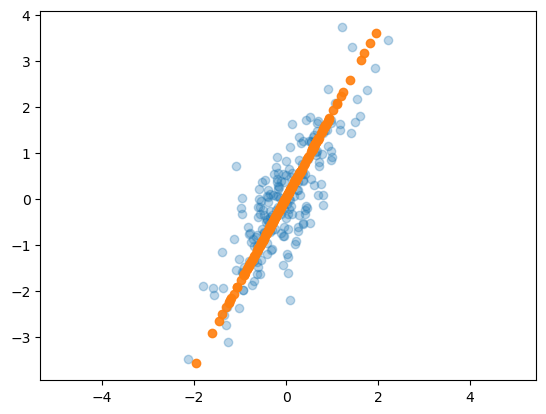

In [30]:
plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.9)
plt.axis('equal')
plt.show()


### IRIS 데이터를 이용한 실습

In [31]:
import pandas as pd 
from sklearn.datasets import load_iris

In [32]:
iris = load_iris()

iris_pd = pd.DataFrame(iris.data, columns= iris.feature_names)
iris_pd['species'] = iris.target

iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [54]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [55]:
iris_pca, pca = get_pca_data(iris_ss, 2)
iris_pca.shape

(150, 2)

In [37]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [38]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [39]:
def get_pd_from_pca(pca_data, cols=['PCA1', 'PCA2']):
    return pd.DataFrame(pca_data, columns=cols)

In [40]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head()

,PCA1,PCA2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


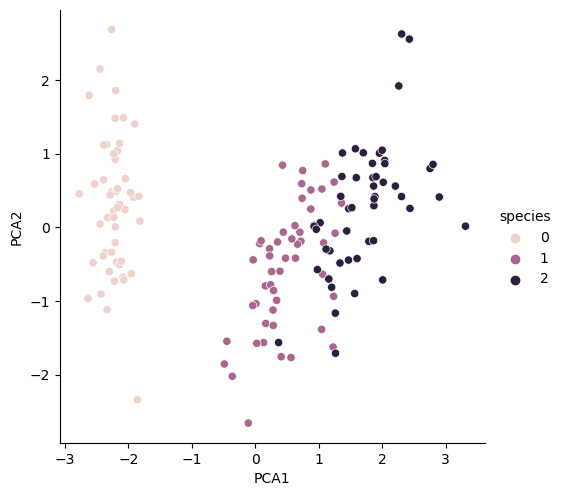

In [41]:
sns.pairplot(iris_pd_pca, hue='species', height=5, x_vars=['PCA1'], y_vars=['PCA2'])

#### randomforest

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [83]:
def rf_scores(X, y, cv=5):
    rf = RandomForestClassifier(random_state=13, n_estimators=100)
    scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)

    print('Score : ',np.mean(scores_rf))

In [84]:
%%time

rf_scores(iris_ss, iris.target)

Score :  0.96
CPU times: total: 2.2 s
Wall time: 3.67 s


In [85]:
pca_X = iris_pd_pca[['PCA1', 'PCA2']]
rf_scores(pca_X, iris.target)

Score :  0.9066666666666666


### 와인데이터를 이용한 실습

In [86]:
import numpy as np

red_wine = pd.read_csv('winequality-red.csv',sep=';')
white_wine = pd.read_csv('winequality-white.csv',sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.
wine = pd.concat([red_wine,white_wine])

X = wine.drop(['color'], axis=1)
y = wine['color']


In [87]:
wine_ss = StandardScaler().fit_transform(X)

In [88]:
def print_variance_ratio(pca):
    print('variance_ratio : ',pca.explained_variance_)
    print('variance_ratio_sum : ',np.sum(pca.explained_variance_))



In [89]:
pca_wine, pca = get_pca_data(wine_ss, n_components=2)
print_variance_ratio(pca)

variance_ratio :  [3.04201535 2.65026192]
variance_ratio_sum :  5.692277268524736


In [90]:
pca_wine_pd = pd.DataFrame(pca_wine,columns=['PC1', 'PC2'])
pca_wine_pd['color'] = y.values
pca_wine_pd

,PC1,PC2,color
0,-3.348438,0.568926,1.0
1,-3.228595,1.197335,1.0
2,-3.237468,0.952580,1.0
3,-1.672561,1.600583,1.0
4,-3.348438,0.568926,1.0
...,...,...,...
6492,0.112718,-1.912247,0.0
6493,1.720296,1.009571,0.0
6494,0.626922,-0.622145,0.0
6495,0.491934,-3.755928,0.0


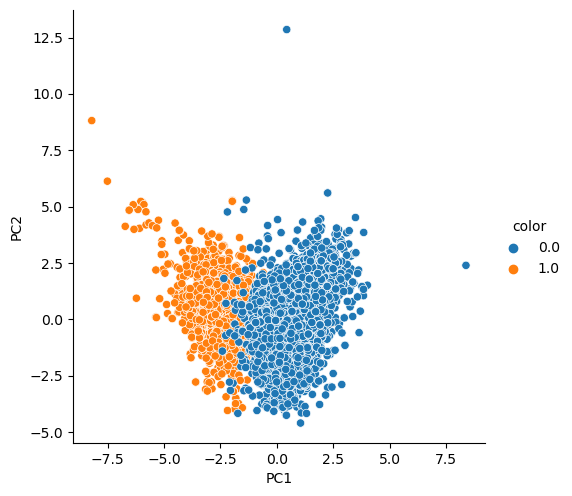

In [91]:
sns.pairplot(pca_wine_pd, hue = 'color', height = 5, x_vars=['PC1'], y_vars=['PC2'])

In [93]:
rf_scores(wine_ss, y)

Score :  0.9935352638124


In [94]:
pca_X = pca_wine_dp[['PC1', 'PC2']]
rf_scores(pca_X, y)

Score :  0.981067803635933


In [111]:
pca_wine, pca = get_pca_data(wine_ss, n_components=3)
print_variance_ratio(pca)

variance_ratio :  [3.04201535 2.65026192 1.64175951]
variance_ratio_sum :  7.334036780557772


In [117]:
pca_cols = ['PC1', 'PC2', 'PC3']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_cols)
pca_wine_pd['color'] = y.values
pca_wine_pd

,PC1,PC2,PC3,color
0,-3.348438,0.568926,-2.727386,1.0
1,-3.228595,1.197335,-1.998904,1.0
2,-3.237468,0.952580,-1.746578,1.0
3,-1.672561,1.600583,2.856552,1.0
4,-3.348438,0.568926,-2.727386,1.0
...,...,...,...,...
6492,0.112718,-1.912247,-0.061138,0.0
6493,1.720296,1.009571,-0.662488,0.0
6494,0.626922,-0.622145,-0.149483,0.0
6495,0.491934,-3.755928,-0.080284,0.0


In [118]:
pca_X = pca_wine_pd[pca_cols]
rf_scores(pca_X, y)

Score :  0.9832236631728548


In [119]:
pca_wine_plot = pca_X
pca_wine_plot['color'] = y.values

In [122]:
import plotly.express as px


fig = px.scatter_3d(pca_wine_plot, x='PC1', y='PC2', z='PC3', color='color', symbol = 'color', opacity = 0.4)
fig.update_layout(margin = dict(l=0, r=0, b=0, t=0))
fig.show()